In [52]:
import sys
sys.path.insert(0, "..")
import speasy as spz
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
import numpy as np

import speasy_utils
from speasy_utils.amda import clean_data


In [62]:
# parameter id
parameter_id = "amda/sw_n"

# start and stop time
start = "2001-01-01T00:00:00"
stop  = "2001-01-12T00:00:00"

In [63]:
parameter_data = spz.get_data(parameter_id, start, stop)
print(f"Parameter data shape : {parameter_data.data.shape}")

Parameter data shape : (14850, 1)


In [64]:
# clean the data
parameter_data.data = clean_data(parameter_data.data)

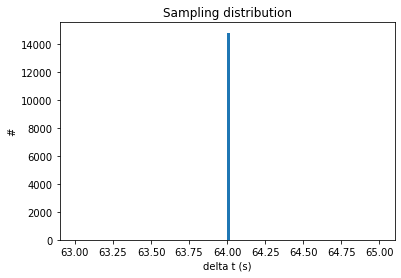

In [65]:
# sampling distribution
plt.hist(np.diff(parameter_data.time), bins=100)
plt.xlabel("delta t (s)")
plt.ylabel("#")
plt.title("Sampling distribution")
plt.show()

In [66]:
# sampling counts
unique, counts = np.unique(np.diff(parameter_data.time), 
                           return_counts=True)
print(f"Unique : {unique}")
print(f"Counts : {counts}")

Unique : [63. 64. 65.]
Counts : [    4 14843     2]


/home/aschulz/Documents/python/speasy_examples/venv/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


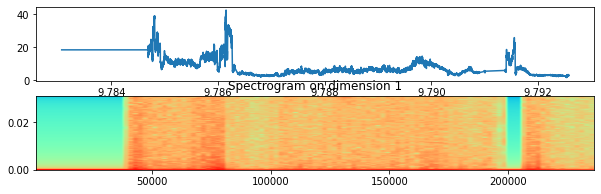

In [70]:
Fs = 1. / 16.
# pyplot spectrogram for each dimension in the data
if len(parameter_data.data.shape)>1:
    n = parameter_data.data.shape[1]
else:
    n = 1
fig, ax = plt.subplots(n+1, 1, figsize=(10,3*n), sharex=False)

ax[0].plot(parameter_data.time, parameter_data.data)
for i in range(1,n+1):
    ax[i].specgram(parameter_data.data[:,i-1], Fs=Fs, cmap="rainbow")
    #ax[i].set_xlabel("Time")
    ax[i].set_title(f"Spectrogram on dimension {i}")
    # get x ticks
#plt.tight_layout()
plt.show()

/home/aschulz/Documents/python/speasy_examples/venv/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/home/aschulz/Documents/python/speasy_examples/venv/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7626: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
/home/aschulz/Documents/python/speasy_examples/venv/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7628: RuntimeWarning: divide by zero encountered in log10
  Z = 20. * np.log10(spec)


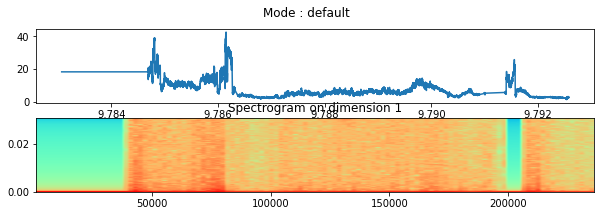

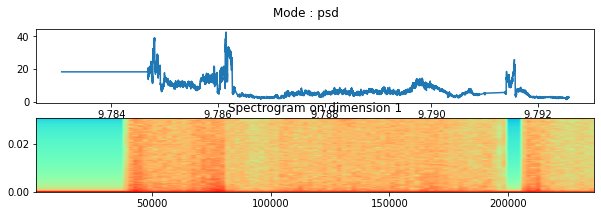

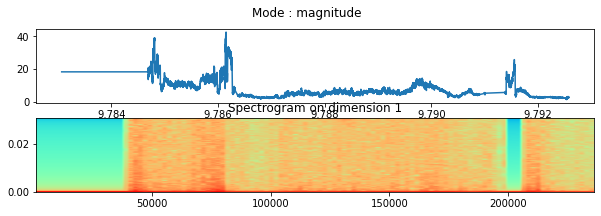

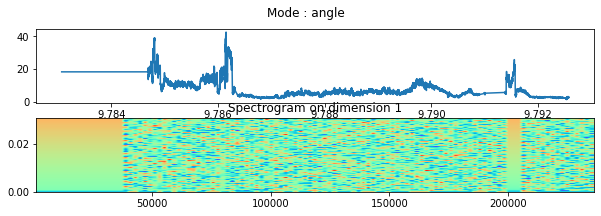

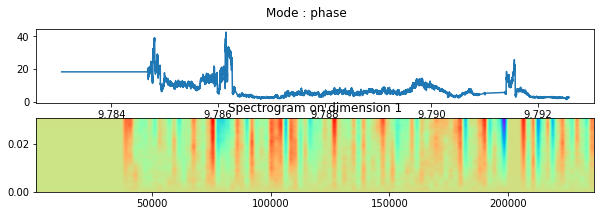

In [69]:
modes = ['default', 'psd', 'magnitude', 'angle', 'phase']
for mode in modes:
    fig, ax = plt.subplots(n+1, 1, figsize=(10,3*n), sharex=False)

    ax[0].plot(parameter_data.time, parameter_data.data)
    for i in range(1,n+1):
        ax[i].specgram(1+parameter_data.data[:,i-1], Fs=Fs, mode=mode, cmap="rainbow")
        #ax[i].set_xlabel("Time")
        ax[i].set_title(f"Spectrogram on dimension {i}")
    fig.suptitle(f"Mode : {mode}")
plt.show()